In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import optuna
from sklearn.model_selection import train_test_split
import catboost as cb
from catboost import CatBoostClassifier
from catboost import Pool, cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

import xgboost as xgb

In [2]:
# Reading csv
df= pd.read_csv(r"C:\Users\jvrdo\Downloads\potencijalni_neo.csv")


In [3]:
df

,dob,velicina_tumora,focality,hist_tip,gradus,er,pr,her2_sish,ki67,broj_meta
0,58,3.0,solitaran,NOS invazivni karcinom,2,3,0,3.0,25.0,0
1,70,7.0,solitaran,lobularni invazivni,3,100,0,1.0,48.0,0
2,58,2.3,solitaran,Ca s medularnim karakteristikama,3,10,0,1.0,80.0,0
3,41,5.5,multifokalan,NOS invazivni karcinom,3,100,5,3.0,40.0,1
4,63,2.2,solitaran,NOS invazivni karcinom,3,0,0,3.0,35.0,1
...,...,...,...,...,...,...,...,...,...,...
771,76,3.2,solitaran,NOS invazivni karcinom,3,0,0,1.0,70.0,0
772,77,6.5,difuzno infiltrirajući,NOS invazivni karcinom,3,0,0,1.0,85.0,0
773,74,6.5,solitaran,NOS invazivni karcinom,2,90,40,1.0,35.0,1
774,68,8.5,difuzno infiltrirajući,lobularni invazivni,2,80,5,0.0,10.0,1


In [266]:
# Dummy encoding categorical variables
df_d= pd.get_dummies(df, columns=["focality","hist_tip"], drop_first=True)

In [267]:
X= df_d.drop(["broj_meta",], axis=1)
y= df_d["broj_meta"]

In [268]:
# New train test split after encoding categorical variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=68)

Text(0.5, 1.0, 'Correlation Heatmap')

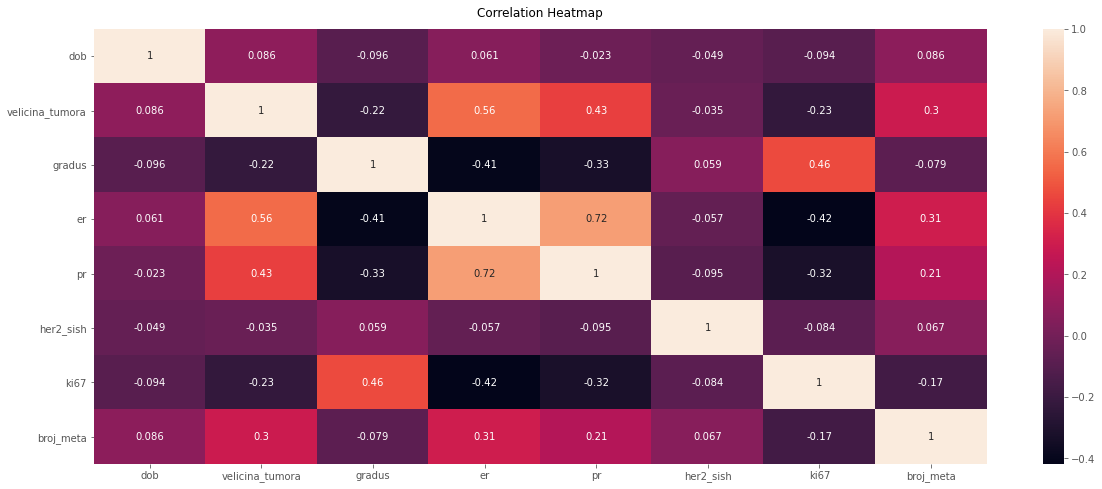

In [307]:
# Increasing the heatmap size
plt.figure(figsize=(20, 8))

# Plotting correlations
heatmap= sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Random Forrest

In [269]:
# Baseline RF
rf = RandomForestClassifier( random_state=68)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=68)

In [270]:
y_pred = rf.predict_proba(X_test)

y_pred= y_pred[:,1].reshape(-1,1)

In [271]:
roc_auc_score(y_test, y_pred)

0.7642350222809045

## RF optimization

In [13]:
# parameter grid
pgrid = {    
    'max_depth' : [50,200,300],    
    'min_samples_split' : [3, 10,20,30],
    'min_samples_leaf' : [1,3,6,10,20,30],
    'class_weight': ['balanced','balanced_subsample']
}

# specifying the cv
cv_skf = StratifiedKFold(n_splits=5, random_state=68, shuffle=True)

# specifying the model 
rfgs = BalancedRandomForestClassifier(n_jobs=-1)



# specify the grid search cv
c = HalvingGridSearchCV(estimator=rfgs,param_grid=pgrid,cv=cv_skf,n_jobs=-1,verbose=1, scoring='roc_auc',random_state=68)

cc= c.fit(X_train,y_train)

n_iterations: 4
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 20
max_resources_: 659
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 144
n_resources: 20
Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


----------
iter: 1
n_candidates: 48
n_resources: 60
Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        n

----------
iter: 2
n_candidates: 16
n_resources: 180
Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        n

----------
iter: 3
n_candidates: 6
n_resources: 540
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\jvrdo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        n

In [14]:
c_pred= cc.predict_proba(X_test)
c_pred= c_pred[:,1].reshape(-1,1)

In [15]:
roc_auc_score(y_test, c_pred)

0.7766019988242211

In [32]:
# Printing best parameters
cc.best_params_

{'class_weight': 'balanced',
 'max_depth': 200,
 'min_samples_leaf': 6,
 'min_samples_split': 30}

## Random forrest with optimized hyperparameters

In [299]:
clf = RandomForestClassifier(random_state=68, class_weight= "balanced", max_depth= 200, min_samples_leaf= 1, min_samples_split= 30, n_estimators= 3000)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=200,
                       min_samples_split=30, n_estimators=3000,
                       random_state=68)

In [300]:
y_pred = clf.predict_proba(X_test)

y_pred= y_pred[:,1].reshape(-1,1)

In [301]:
roc_auc_score(y_test, y_pred)

0.8029377785113054

## Plotting results

In [302]:
# Importing libraries for roc-auc and precision recall curve visualizations
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import binarize
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [303]:
def plot_precision_recall_curve(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('Positive node', average_precision_score(t_y,p_y)))
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')
    return precision, recall, thresholds

(array([0.53205128, 0.52903226, 0.53246753, 0.53594771, 0.53947368,
        0.54304636, 0.54666667, 0.55033557, 0.5472973 , 0.55102041,
        0.55479452, 0.55862069, 0.5625    , 0.55944056, 0.55633803,
        0.56028369, 0.56428571, 0.56834532, 0.56521739, 0.5620438 ,
        0.56617647, 0.57037037, 0.57462687, 0.57894737, 0.58333333,
        0.58015267, 0.58461538, 0.58914729, 0.59375   , 0.5984252 ,
        0.6031746 , 0.608     , 0.61290323, 0.6097561 , 0.6147541 ,
        0.61983471, 0.625     , 0.6302521 , 0.62711864, 0.63247863,
        0.63793103, 0.64347826, 0.64912281, 0.6460177 , 0.65178571,
        0.65765766, 0.66363636, 0.66972477, 0.67592593, 0.68224299,
        0.67924528, 0.68571429, 0.68269231, 0.68932039, 0.69607843,
        0.7029703 , 0.7       , 0.70707071, 0.71428571, 0.71134021,
        0.71875   , 0.72631579, 0.72340426, 0.72043011, 0.7173913 ,
        0.71428571, 0.72222222, 0.73033708, 0.73863636, 0.74712644,
        0.74418605, 0.75294118, 0.76190476, 0.77

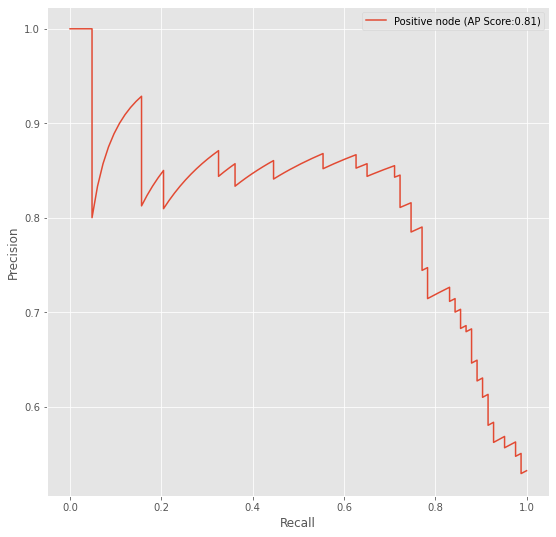

In [304]:
plot_precision_recall_curve(y_test,y_pred)

In [24]:
def plot_roc_curve(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    fpr, tpr, thresholds = roc_curve(t_y, p_y)
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('Positive node', auc(fpr, tpr)))
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

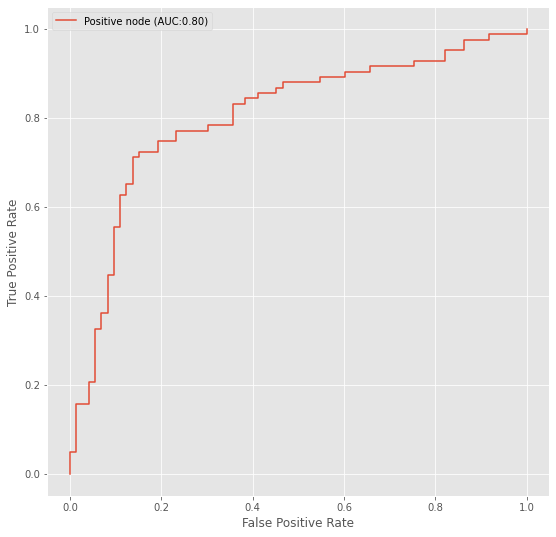

In [305]:
plot_roc_curve(y_test, y_pred)
plt.style.use("ggplot")
plt.show()

## XGBoost with Optuna

In [34]:
def objective(trial, data=X, target=y):
    X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.15, random_state=68)

    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 31),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.005, 0.02, 0.05, 0.08, 0.1]),
        'n_estimators': trial.suggest_int('n_estimators', 200, 8000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'gamma': trial.suggest_float('gamma', 0.0001, 1.0, log = True),
        'alpha': trial.suggest_float('alpha', 0.0001, 10.0, log = True),
        'lambda': trial.suggest_float('lambda', 0.0001, 10.0, log = True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.8),
        'subsample': trial.suggest_float('subsample', 0.1, 0.8),
        
        'booster': 'gbtree',
        'random_state': 68,
        'use_label_encoder': False,
        'eval_metric': 'auc'

    }
    
    model = xgb.XGBClassifier(**params)  
    model.fit(X_train, y_train, eval_set = [(X_val,y_val)], early_stopping_rounds = 333, verbose = False)
    y_pred = model.predict_proba(X_val)[:,1]
    roc_auc = roc_auc_score(y_val, y_pred)

    return roc_auc
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)
print('Best value: ', study.best_value)

[I 2022-09-27 13:22:59,974] A new study created in memory with name: no-name-ee1223b9-ee10-4d30-8abf-787ac25229ae
C:\Users\jvrdo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-09-27 13:23:00,114] Trial 0 finished with value: 0.5 and parameters: {'max_depth': 14, 'learning_rate': 0.08, 'n_estimators': 1402, 'min_child_weight': 176, 'gamma': 0.0004339296886320369, 'alpha': 5.957839546645065, 'lambda': 1.9663205555572125, 'colsample_bytree': 0.46383997025364254, 'subsample': 0.7533596249356296}. Best is trial 0 with value: 0.5.
C:\Users\jvrdo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

Best value:  0.8274544385655496


Trial 444 finished with value: 0.8274544385655496 and parameters: {'max_depth': 19, 'learning_rate': 0.1, 'n_estimators': 2211, 'min_child_weight': 1, 'gamma': 0.007857613073094759, 'alpha': 0.04285059005535105, 'lambda': 0.11951561366911526, 'colsample_bytree': 0.7467390701849955, 'subsample': 0.45329553678755585}. Best is trial 444 with value: 0.8274544385655496.

In [106]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=68)

In [107]:
# Initiating optimized version
# tree_method="gpu_hist", subsample=0.4532, colsample_bytree=0.7467, learning_rate=0.1, max_depth=19, n_estimators=2211, min_child_weight=1, gamma=0.0078, alpha=0.0428, reg_lambda=0.1195
xgc = xgb.XGBClassifier(
      subsample=0.45329553678755585, colsample_bytree=0.7467390701849955, learning_rate=0.1, max_depth=19, n_estimators=200, min_child_weight=1, gamma= 0.007857613073094759, 
    alpha= 0.04285059005535105, reg_lambda=0.11951561366911526
    
)

# Fitting the model
xgc.fit(X_train, y_train)

XGBClassifier(alpha=0.04285059005535105, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7467390701849955, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.007857613073094759, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=19, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.0428505912, ...)

In [108]:
# Optimized XBG predictions
y_pred_xn= xgc.predict_proba(X_val)

y_pred_xn= y_pred_xn[:,1].reshape(-1,1)

In [109]:
# Optimized XGB score
roc_auc_score(y_val, y_pred_xn)

0.6916519694297472

In [104]:
study.best_params

{'max_depth': 19,
 'learning_rate': 0.1,
 'n_estimators': 2211,
 'min_child_weight': 1,
 'gamma': 0.007857613073094759,
 'alpha': 0.04285059005535105,
 'lambda': 0.11951561366911526,
 'colsample_bytree': 0.7467390701849955,
 'subsample': 0.45329553678755585}

## CatBoost

In [239]:
# Picking X and y before dummy encoding
X= df.drop(["broj_meta",], axis=1)
y= df["broj_meta"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=68)

In [240]:
# Picking categorical columns
categorical_features_indices = np.where(X_train.dtypes != float)[0]

In [241]:
train_dataset = cb.Pool(data=X_train,
                     label=y_train,
                     cat_features = categorical_features_indices) 
test_dataset = cb.Pool(X_test, y_test,cat_features = categorical_features_indices)

In [188]:
# specifying the cv


def objective(trial):
    param = {
        
        "max_depth":trial.suggest_int("max_depth", 3, 16),
        "n_estimators":trial.suggest_int("n_estimators", 80, 600),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.2),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'bagging_temperature':trial.suggest_int("bagging_temperature", 0,10),
        'max_bin':trial.suggest_categorical('max_bin', [10,200,400]),
        'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        
        'od_type' : "Iter",
        'od_wait' : 100,
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 1),
         'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
        'custom_metric' : ['AUC'],
        "loss_function": "Logloss",
        
        'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        }

    scores = cv(train_dataset,
            param,
            fold_count=5, 
            early_stopping_rounds=30,         
            plot=False, verbose=False)

    return scores['test-AUC-mean'].max()

Second optimization method:
def objective(trial):
    param = {
        'iterations':trial.suggest_categorical('iterations', [100,200,300,500,700,1000,1200,1300,1500]),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'bagging_temperature':trial.suggest_int("bagging_temperature", 0,10),
        'max_bin':trial.suggest_categorical('max_bin', [4,5,6,8,10,20,30]),
        'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10,20),
        'od_type' : "Iter",
        'od_wait' : 100,
        "depth": trial.suggest_int("max_depth", 2,10,15),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
         'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
        'custom_metric' : ['AUC'],
        "loss_function": "Logloss",
        'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        }

    scores = cv(train_dataset,
            param,
            fold_count=5, 
            early_stopping_rounds=10,         
            plot=False, verbose=False)

    return scores['test-AUC-mean'].max()

In [189]:
sampler = optuna.samplers.TPESampler(seed=68)  # Make the sampler behave in a deterministic way.
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=300)

[I 2022-09-28 08:48:01,847] A new study created in memory with name: no-name-b12dcf96-f186-4a38-8dc1-c9bc87ce1b01


Training on fold [0/5]

bestTest = 0.6443165236
bestIteration = 82

Training on fold [1/5]

bestTest = 0.6197249644
bestIteration = 95

Training on fold [2/5]

bestTest = 0.6588893052
bestIteration = 43

Training on fold [3/5]

bestTest = 0.6195211501
bestIteration = 99

Training on fold [4/5]


[I 2022-09-28 08:48:14,764] Trial 0 finished with value: 0.7040663132368495 and parameters: {'max_depth': 6, 'n_estimators': 102, 'min_data_in_leaf': 59, 'learning_rate': 0.02338992139441316, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.6061587135455769, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 0 with value: 0.7040663132368495.



bestTest = 0.6472639691
bestIteration = 78

Training on fold [0/5]

bestTest = 0.6357005753
bestIteration = 35

Training on fold [1/5]

bestTest = 0.6246493843
bestIteration = 34

Training on fold [2/5]


[I 2022-09-28 08:48:15,161] Trial 1 finished with value: 0.6968808528751645 and parameters: {'max_depth': 6, 'n_estimators': 356, 'min_data_in_leaf': 70, 'learning_rate': 0.058703465630587995, 'random_strength': 1, 'bagging_temperature': 10, 'max_bin': 10, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.005401622984047985, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.7040663132368495.



bestTest = 0.6411596583
bestIteration = 15

Training on fold [3/5]

bestTest = 0.6067676934
bestIteration = 51

Training on fold [4/5]

bestTest = 0.6467507974
bestIteration = 32

Training on fold [0/5]

bestTest = 0.6691159879
bestIteration = 6

Training on fold [1/5]

bestTest = 0.6274016203
bestIteration = 13

Training on fold [2/5]

bestTest = 0.6523905803
bestIteration = 5

Training on fold [3/5]

bestTest = 0.5997036068
bestIteration = 29



[I 2022-09-28 08:48:15,482] Trial 2 finished with value: 0.6945981348192865 and parameters: {'max_depth': 4, 'n_estimators': 252, 'min_data_in_leaf': 18, 'learning_rate': 0.1682439555957526, 'random_strength': 7, 'bagging_temperature': 5, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 1.090189939164187e-08, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 0 with value: 0.7040663132368495.


Training on fold [4/5]

bestTest = 0.6537172511
bestIteration = 10

Training on fold [0/5]

bestTest = 0.6372445783
bestIteration = 113

Training on fold [1/5]

bestTest = 0.6228031143
bestIteration = 131

Training on fold [2/5]

bestTest = 0.6519692743
bestIteration = 70

Training on fold [3/5]

bestTest = 0.6097842473
bestIteration = 131

Training on fold [4/5]


[I 2022-09-28 08:48:56,799] Trial 3 finished with value: 0.6933423625622372 and parameters: {'max_depth': 16, 'n_estimators': 132, 'min_data_in_leaf': 80, 'learning_rate': 0.015885689173443417, 'random_strength': 3, 'bagging_temperature': 0, 'max_bin': 10, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 8.102576299875903e-06, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.7040663132368495.



bestTest = 0.6509708064
bestIteration = 109

Training on fold [0/5]

bestTest = 0.6688561286
bestIteration = 4

Training on fold [1/5]

bestTest = 0.6687052694
bestIteration = 8

Training on fold [2/5]

bestTest = 0.6597603126
bestIteration = 6

Training on fold [3/5]

bestTest = 0.6486796359
bestIteration = 13

Training on fold [4/5]


[I 2022-09-28 08:48:57,804] Trial 4 finished with value: 0.6785094677914506 and parameters: {'max_depth': 12, 'n_estimators': 109, 'min_data_in_leaf': 87, 'learning_rate': 0.08024627698534305, 'random_strength': 7, 'bagging_temperature': 0, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 4.734356210598529e-05, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 0 with value: 0.7040663132368495.



bestTest = 0.6667003151
bestIteration = 6

Training on fold [0/5]

bestTest = 0.6344571127
bestIteration = 81

Training on fold [1/5]

bestTest = 0.6179617549
bestIteration = 95

Training on fold [2/5]

bestTest = 0.6415900311
bestIteration = 61

Training on fold [3/5]


[I 2022-09-28 08:48:58,698] Trial 5 finished with value: 0.7133353971570828 and parameters: {'max_depth': 12, 'n_estimators': 328, 'min_data_in_leaf': 64, 'learning_rate': 0.02280008891909957, 'random_strength': 9, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.068648773820876, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 5 with value: 0.7133353971570828.



bestTest = 0.571655409
bestIteration = 209

Training on fold [4/5]

bestTest = 0.6437848118
bestIteration = 71

Training on fold [0/5]

bestTest = 0.6261030526
bestIteration = 44

Training on fold [1/5]

bestTest = 0.6283862895
bestIteration = 59

Training on fold [2/5]

bestTest = 0.6414785424
bestIteration = 57

Training on fold [3/5]

bestTest = 0.6122185639
bestIteration = 57

Training on fold [4/5]


[I 2022-09-28 08:49:21,971] Trial 6 finished with value: 0.6937261047906509 and parameters: {'max_depth': 14, 'n_estimators': 316, 'min_data_in_leaf': 61, 'learning_rate': 0.05417453416964159, 'random_strength': 6, 'bagging_temperature': 8, 'max_bin': 400, 'grow_policy': 'Depthwise', 'l2_leaf_reg': 0.16503711176343958, 'one_hot_max_size': 10, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 5 with value: 0.7133353971570828.



bestTest = 0.6515494948
bestIteration = 20

Training on fold [0/5]

bestTest = 0.6544756519
bestIteration = 5

Training on fold [1/5]

bestTest = 0.6731787017
bestIteration = 5

Training on fold [2/5]

bestTest = 0.683179367
bestIteration = 0

Training on fold [3/5]

bestTest = 0.7131056239
bestIteration = 0

Training on fold [4/5]


[I 2022-09-28 08:49:27,318] Trial 7 finished with value: 0.6440973995820757 and parameters: {'max_depth': 11, 'n_estimators': 195, 'min_data_in_leaf': 57, 'learning_rate': 0.12145235697556932, 'random_strength': 9, 'bagging_temperature': 4, 'max_bin': 400, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 1.3727172631604182e-08, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 5 with value: 0.7133353971570828.



bestTest = 0.6653853804
bestIteration = 1

Training on fold [0/5]

bestTest = 0.6256190963
bestIteration = 12

Training on fold [1/5]

bestTest = 0.6321447214
bestIteration = 23

Training on fold [2/5]

bestTest = 0.6745892838
bestIteration = 1

Training on fold [3/5]

bestTest = 0.6200708833
bestIteration = 11

Training on fold [4/5]


[I 2022-09-28 08:49:43,247] Trial 8 finished with value: 0.6782407837370688 and parameters: {'max_depth': 14, 'n_estimators': 174, 'min_data_in_leaf': 96, 'learning_rate': 0.09974450691421417, 'random_strength': 1, 'bagging_temperature': 0, 'max_bin': 200, 'grow_policy': 'SymmetricTree', 'l2_leaf_reg': 0.10192861045672252, 'one_hot_max_size': 5, 'auto_class_weights': 'Balanced'}. Best is trial 5 with value: 0.7133353971570828.



bestTest = 0.6377418209
bestIteration = 11

Training on fold [0/5]

bestTest = 0.6241423721
bestIteration = 49

Training on fold [1/5]

bestTest = 0.6144355562
bestIteration = 70

Training on fold [2/5]

bestTest = 0.6462954602
bestIteration = 25

Training on fold [3/5]

bestTest = 0.6086392739
bestIteration = 94

Training on fold [4/5]


[I 2022-09-28 08:50:03,588] Trial 9 finished with value: 0.7123706240487062 and parameters: {'max_depth': 6, 'n_estimators': 95, 'min_data_in_leaf': 60, 'learning_rate': 0.05716173093263192, 'random_strength': 4, 'bagging_temperature': 8, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 5.320893823324383e-06, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 5 with value: 0.7133353971570828.



bestTest = 0.6498800706
bestIteration = 38

Training on fold [0/5]

bestTest = 0.6511501809
bestIteration = 8

Training on fold [1/5]

bestTest = 0.6262025049
bestIteration = 6

Training on fold [2/5]

bestTest = 0.6311871033
bestIteration = 6

Training on fold [3/5]

bestTest = 0.5783883908
bestIteration = 52

Training on fold [4/5]



[I 2022-09-28 08:50:04,028] Trial 10 finished with value: 0.7021995846554704 and parameters: {'max_depth': 9, 'n_estimators': 527, 'min_data_in_leaf': 33, 'learning_rate': 0.13939664734134222, 'random_strength': 10, 'bagging_temperature': 10, 'max_bin': 200, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 0.0018605360377867257, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 5 with value: 0.7133353971570828.


bestTest = 0.6600342653
bestIteration = 3

Training on fold [0/5]

bestTest = 0.6358230537
bestIteration = 266

Training on fold [1/5]

bestTest = 0.6291896249
bestIteration = 264

Training on fold [2/5]

bestTest = 0.6444238449
bestIteration = 277

Training on fold [3/5]

bestTest = 0.5804740276
bestIteration = 391

Training on fold [4/5]


[I 2022-09-28 08:50:05,872] Trial 11 finished with value: 0.7074544023940355 and parameters: {'max_depth': 8, 'n_estimators': 469, 'min_data_in_leaf': 41, 'learning_rate': 0.005850154385948811, 'random_strength': 4, 'bagging_temperature': 7, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 1.6117091883452394e-06, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 5 with value: 0.7133353971570828.



bestTest = 0.6493919085
bestIteration = 167

Training on fold [0/5]

bestTest = 0.6219669399
bestIteration = 67

Training on fold [1/5]

bestTest = 0.6203500059
bestIteration = 42

Training on fold [2/5]

bestTest = 0.6408097326
bestIteration = 59

Training on fold [3/5]

bestTest = 0.5912252717


[I 2022-09-28 08:50:06,339] Trial 12 finished with value: 0.7112005649717513 and parameters: {'max_depth': 3, 'n_estimators': 412, 'min_data_in_leaf': 42, 'learning_rate': 0.04786018790964962, 'random_strength': 4, 'bagging_temperature': 8, 'max_bin': 400, 'grow_policy': 'Lossguide', 'l2_leaf_reg': 4.3253040240591904e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 5 with value: 0.7133353971570828.


bestIteration = 112

Training on fold [4/5]

bestTest = 0.649698337
bestIteration = 44

Training on fold [0/5]

bestTest = 0.6605571203
bestIteration = 7

Training on fold [1/5]

bestTest = 0.6533262896
bestIteration = 12

Training on fold [2/5]


KeyboardInterrupt: 

In [262]:
# final model (hiperparametri uzeti iz prethodnog notebooka "Cat_boost_lymph node")
final_model = CatBoostClassifier(verbose=False,  cat_features=categorical_features_indices, 
                          n_estimators=150,
    learning_rate=0.01648408,
    random_strength=2,
    bagging_temperature=5,
    max_bin=200,
    grow_policy="Depthwise",
    min_data_in_leaf=3,
    max_depth=10,
    l2_leaf_reg=0.133434,
    one_hot_max_size=512,
    auto_class_weights="SqrtBalanced")

In [263]:
final_model.fit(X_train, y_train)

In [264]:
predictions_h1 = final_model.predict_proba(X_test)
predictions_h1 = predictions_h1[:,1].reshape(-1,1)

In [265]:
roc_auc_score(y_test, predictions_h1)

0.7922099356329427